In [2]:
from google.colab import files
uploaded = files.upload()

Saving Quasi-yagi_truncado_com complemento.xlsx to Quasi-yagi_truncado_com complemento.xlsx


In [3]:
%matplotlib inline

import re
import xgboost as xgb
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import pyplot
from xgboost.sklearn import XGBRegressor 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import StratifiedKFold 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_excel('Quasi-yagi_truncado_com complemento.xlsx')
data=df.copy()
x=data.drop(labels=['G1','G2','G3'],axis=1)
y=data[['G1','G2','G3']]

seed = 10
np.random.seed(seed)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=seed)

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)


In [32]:
model = RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 200, stop =2000, num = 4)]
max_features = ['auto']
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
min_samples_split = [5]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]

    
param_grid = dict( n_estimators=n_estimators,max_features=max_features,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,bootstrap=bootstrap)
kfold = KFold(n_splits=15, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_mean_squared_error", n_jobs=-1, cv=kfold, verbose=1)

eval_set = [(X_train_std, y_train), (X_test_std, y_test)]
grid_result = grid_search.fit(X_train_std, y_train)


Fitting 15 folds for each of 72 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 16.1min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 41.9min finished


In [33]:
final_model = grid_search.best_estimator_
#xg_reg.fit(X_train,y_train)
preds = final_model.predict(X_test_std)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 2.521962


In [0]:
 def  plot_var(var_name,y_true,y_pred): 
    
    target_true = y_test.values.ravel()
    target_pred = preds.ravel()     
    
   
    num_instances = range(len(target_true))
    z = np.argsort(target_true)
    plt.figure(figsize=(15, 8))
    plt.scatter(num_instances, target_true[z], s=40, c= 'r', marker='x',
                                                  alpha=0.5, linewidths=1,
                                                  edgecolors='w', label='Original Data')
    plt.scatter(num_instances, target_pred[z], s=40, c='w', marker='o',
                                                  alpha=0.5, linewidths=1,
                                                  edgecolors='b', label='Predicted Data')
    plt.ylabel(var_name)
    plt.xlabel('Ordered target variables')
    plt.legend()

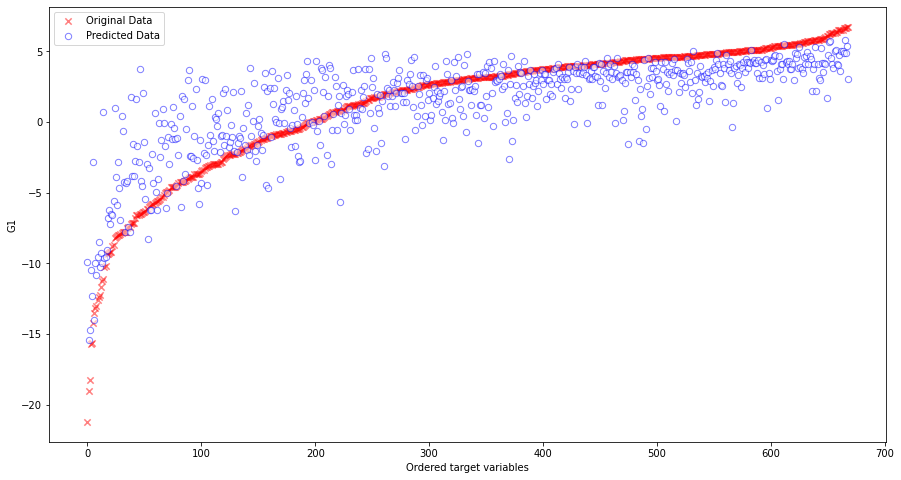

In [35]:
plot_var(var_name='G1', y_true=y_test, y_pred=preds)